In [14]:
import json

with open('NecessariesPrices_1.json', 'r') as f:
    json_data_1 = json.load(f)
with open('NecessariesPrices_2.json', 'r') as f:
    json_data_2 = json.load(f)
with open('NecessariesPrices_3.json', 'r') as f:
    json_data_3 = json.load(f)
with open('NecessariesPrices_4.json', 'r') as f:
    json_data_4 = json.load(f)
with open('NecessariesPrices_5.json', 'r') as f:
    json_data_5 = json.load(f)

In [18]:
json_data = json_data_1['ListNecessariesPricesService']['row']\
            +json_data_2['ListNecessariesPricesService']['row']\
            +json_data_3['ListNecessariesPricesService']['row']\
            +json_data_4['ListNecessariesPricesService']['row']\
            +json_data_5['ListNecessariesPricesService']['row']

# 9-1 : 문제 설정

### 문제 (1) 구별로 물가에 얼마나 차이가 있는가? 평균 ~ , 상관관계
### 문제 (2) 백화점과 시장은 얼마나 물가차이가 나는가?

# 9-2 : 문제의 답

In [23]:
import pyspark
import os
import numpy as np
import matplotlib.pyplot as plt

os.environ["PYSPARK_PYTHON"]='C:\\Users\\201910810\\Anaconda3\\python.exe'
os.environ["PYSPARK_DRIVER_PYTHON"]='C:\\Users\\201910810\\Anaconda3\\python.exe'

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [25]:
df = spark.createDataFrame(json_data)

### 문제 (1) 구별로 물가에 얼마나 차이가 있는가? 평균 ~ , 상관관계

In [64]:
from pyspark.sql.functions import desc
df1 = df.groupBy('M_GU_NAME').avg('A_PRICE').sort(desc('avg(A_PRICE)'))
df1.show(100)

+---------+------------------+
|M_GU_NAME|      avg(A_PRICE)|
+---------+------------------+
|   중랑구| 7852.107142857143|
|   강남구| 7483.746606334842|
|   노원구| 7193.612745098039|
| 서대문구| 7146.200980392156|
| 영등포구| 7063.380392156862|
|     중구| 6988.069230769231|
|   성북구|  6697.22794117647|
|   서초구| 6681.099502487562|
|   관악구| 6505.505882352942|
|   송파구| 6440.019607843137|
|   금천구|   6351.8407960199|
| 동대문구| 6199.137254901961|
|   용산구| 6178.226244343891|
|   강북구| 6152.254901960784|
|   구로구| 6063.112745098039|
|   도봉구| 6010.980392156863|
|   종로구| 6004.411764705882|
|   강동구| 5980.735294117647|
|   광진구| 5974.901960784314|
|   동작구|5908.8725490196075|
|   강서구|            5907.5|
|   마포구| 5849.395721925133|
|   은평구|  5684.47963800905|
|   양천구| 5482.529411764706|
|   성동구| 5413.838235294118|
+---------+------------------+



중랑구의 평균물가가 가장 비싸고 성동구의 평균 물가가 가장 싸다.

### 문제 (2) 대형마트와 전통시장은 얼마나 물가차이가 나는가?

In [67]:
df2 = df.groupBy('M_GU_NAME').pivot('M_TYPE_NAME').avg('A_PRICE').sort(desc('대형마트')).na.drop()
df2.show(100)

+---------+------------------+-----------------+
|M_GU_NAME|          대형마트|         전통시장|
+---------+------------------+-----------------+
| 서대문구| 8437.107843137255|5855.294117647059|
|   노원구| 8436.245098039215|5950.980392156863|
|   중랑구|         8067.3125|7636.901785714285|
|   강남구| 7947.075630252101|6943.196078431372|
|   성북구| 7830.338235294118|5564.117647058823|
| 영등포구| 7692.477124183007|6119.735294117647|
|   관악구|  7605.14705882353|5772.411764705882|
|     중구| 7504.481012658228|6188.137254901961|
|   송파구| 7227.098039215686|5652.941176470588|
| 동대문구| 7174.656862745098|5223.617647058823|
|   서초구| 6907.233333333334|           6016.0|
|   강북구|  6765.78431372549|5538.725490196079|
|   용산구|6691.0672268907565|5579.911764705882|
|   동작구|  6661.21568627451|5156.529411764706|
|   구로구| 6617.401960784314|5508.823529411765|
|   강동구| 6562.549019607844|5398.921568627451|
|   금천구| 6394.411764705882|6307.979797979798|
|   성동구| 6324.078431372549|4503.598039215686|
|   도봉구| 6247.843137254902|5774.117

대부분의 전통시장이 더 싸지만 양천구는 대형마트가 더 싸다.

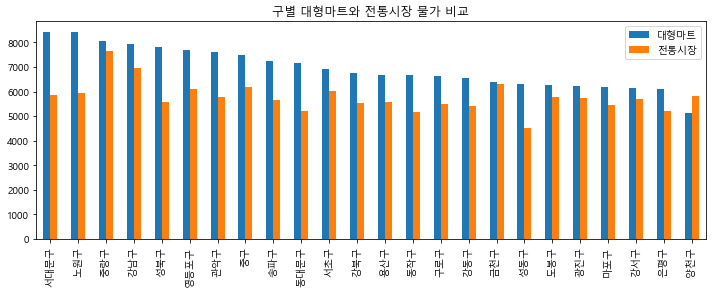

In [86]:
%matplotlib inline
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt

mpl.rc('font', family = 'Malgun Gothic')

dfPandas = df2.toPandas().dropna()
ax = dfPandas.plot(kind='bar', title='구별 대형마트와 전통시장 물가 비교', figsize=(12, 4), legend=True)
ax.legend(['대형마트', '전통시장'])


x_labels = dfPandas.M_GU_NAME.tolist()
ax = ax.set_xticklabels(x_labels)